Обработка и очистка датасета

In [20]:
import pandas as pd

df1=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2019-2020_SofaScore.csv')
df2=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2020-2021_SofaScore.csv')
df3=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2021-2022_SofaScore.csv')

new_df = pd.concat([df1,df2,df3],ignore_index=True)
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1140 non-null   int64  
 1   Team1                    1140 non-null   object 
 2   Team2                    1140 non-null   object 
 3   Referee                  1140 non-null   object 
 4   Coef_1                   1140 non-null   float64
 5   Coef_X                   1140 non-null   float64
 6   Coef_2                   1140 non-null   float64
 7   Total_Fouls              1140 non-null   int64  
 8   Team1_Score              1140 non-null   int64  
 9   Team2_Score              1140 non-null   int64  
 10  Team1_Intensive          1140 non-null   int64  
 11  Team2_Intensive          1140 non-null   int64  
 12  Intensive                1140 non-null   int64  
 13  Team1_Ball_possession    1140 non-null   int64  
 14  Team2_Ball_possession   

,Unnamed: 0,Coef_1,Coef_X,Coef_2,Total_Fouls,Team1_Score,Team2_Score,Team1_Intensive,Team2_Intensive,Intensive,...,Ref_Mean_Cards,Ref_Mean_Fouls,Team1_Mean_Fouls_Home,Team1_Mean_Fouls,Team2_Mean_Fouls_Away,Team2_Mean_Fouls,Team1_PPDA,Team2_PPDA,Team1_Pre_PPDA,Team2_Pre_PPDA
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,0.0,0.0
mean,189.500000,3.019284,4.227515,4.471319,21.156140,0.959649,0.820175,1245.835965,1026.066667,219.769298,...,3.413587,21.312701,10.662942,10.642429,10.605354,10.654909,12.636342,13.934772,NaN,NaN
std,109.744315,2.343191,1.459276,3.980999,5.394222,1.107934,1.026487,647.336869,595.566769,1176.978162,...,0.949767,2.803394,1.733275,1.399593,1.634444,1.413899,7.388922,8.884136,NaN,NaN
min,0.000000,1.030000,2.800000,1.080000,6.000000,0.000000,0.000000,0.000000,0.000000,-2820.000000,...,0.000000,7.000000,3.000000,3.000000,3.000000,3.000000,3.190000,2.880000,NaN,NaN
25%,94.750000,1.660000,3.400000,2.150000,17.000000,0.000000,0.000000,758.750000,577.000000,-575.250000,...,2.800000,19.805804,9.661765,9.777778,9.733333,9.857143,7.670000,8.257500,NaN,NaN
50%,189.500000,2.250000,3.750000,3.200000,21.000000,1.000000,1.000000,1157.500000,933.500000,217.000000,...,3.333333,21.071429,10.636364,10.522510,10.500000,10.555556,10.705000,11.675000,NaN,NaN
75%,284.250000,3.500000,4.500000,5.250000,25.000000,1.000000,1.000000,1657.250000,1375.250000,1047.500000,...,4.000000,23.153846,11.750000,11.466667,11.446970,11.500000,15.070000,16.817500,NaN,NaN
max,379.000000,23.000000,19.000000,41.000000,42.000000,7.000000,6.000000,3743.000000,3028.000000,3573.000000,...,7.000000,35.000000,18.000000,19.000000,19.000000,18.000000,77.750000,82.200000,NaN,NaN


In [21]:
#заполняем пропуски у рейтингов
lists = new_df[new_df['Team2_Ratings']==0][['Team1_Ratings','Team2_Ratings']].columns
for i in lists:
    new_df.loc[new_df['Team2_Ratings']==0, i] = new_df[i].median()
new_df = new_df.select_dtypes(exclude=['object']).drop(columns=['Unnamed: 0','Team1_Pre_PPDA','Team2_Pre_PPDA','Team1_Fouls','Team2_Fouls'])

Отбор признаков

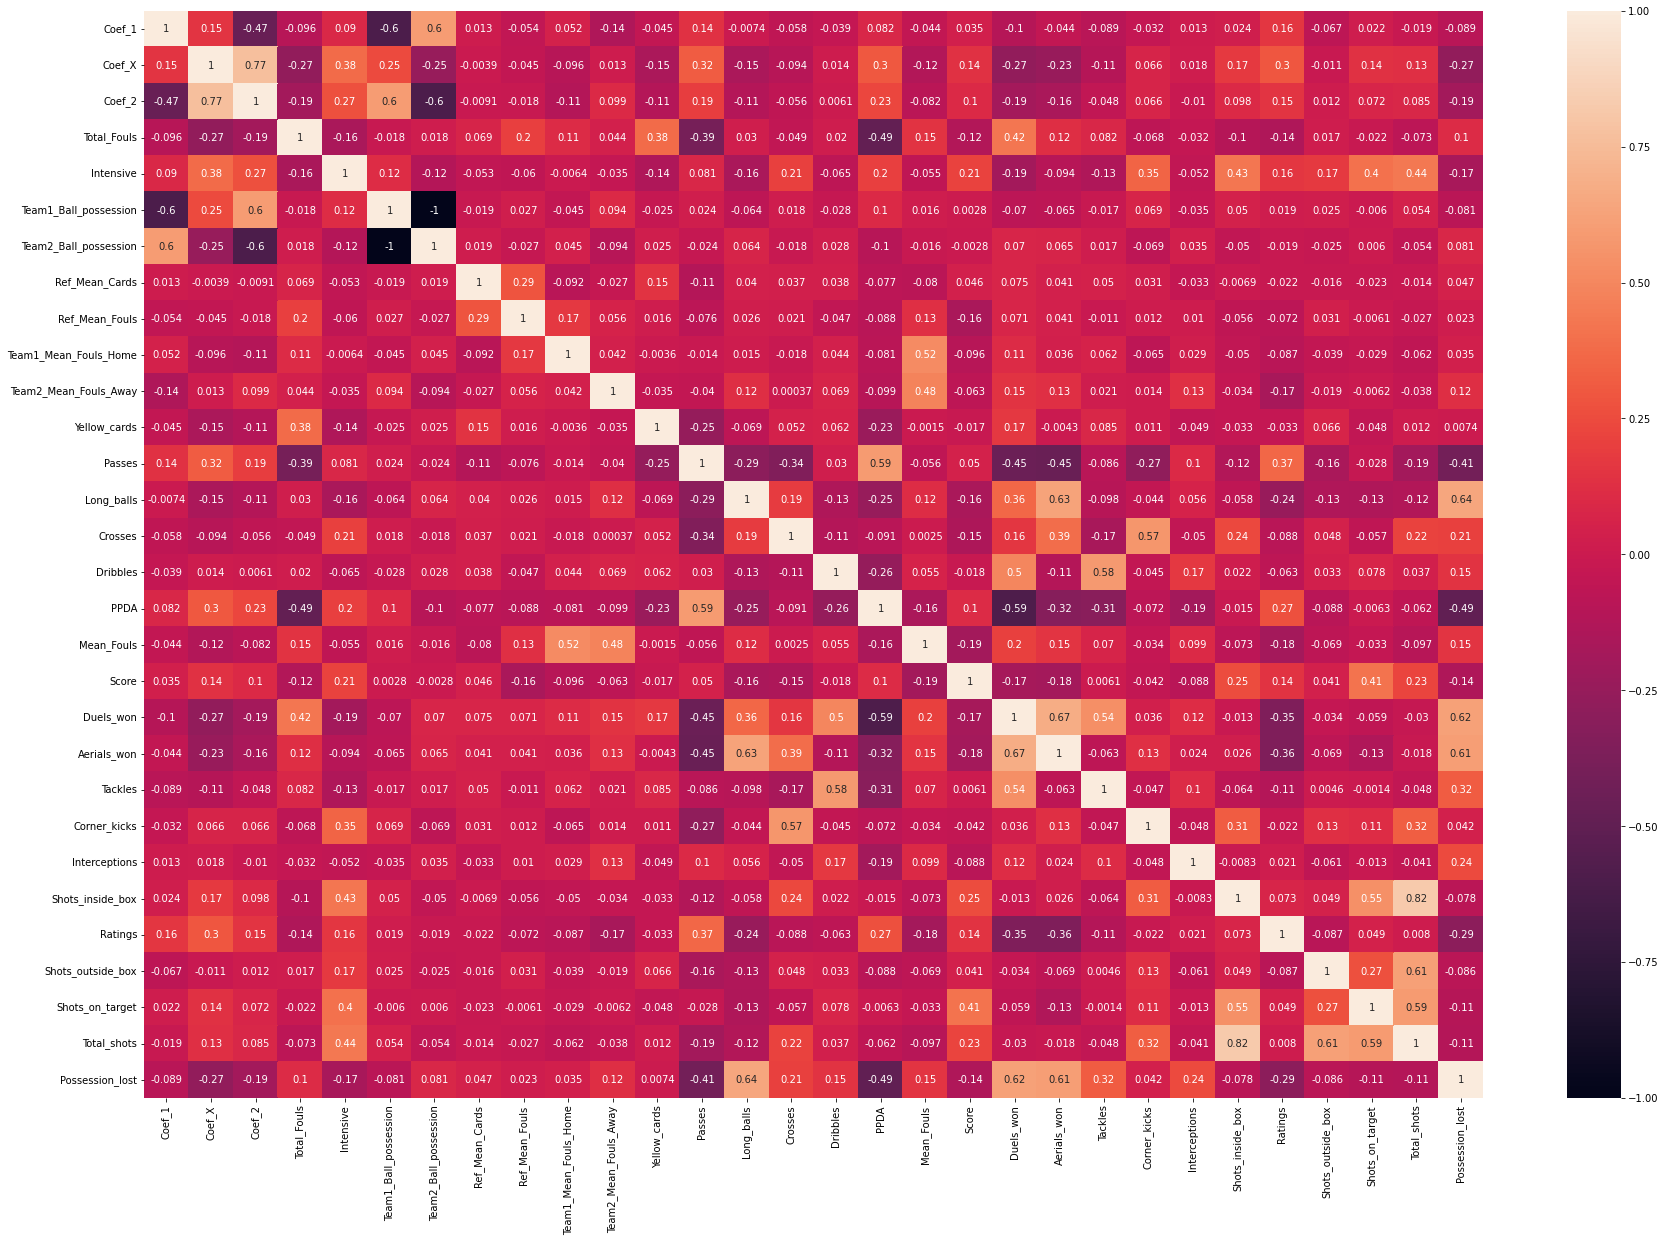

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,20))
statistics = ['Intensive', 'Yellow_cards', 'Passes', 'Long_balls', 'Crosses', 'Dribbles', 'PPDA', 'Mean_Fouls','Score',
                  'Duels_won', 'Aerials_won', 'Tackles', 'Corner_kicks', 'Interceptions', 'Shots_inside_box', 'Ratings',
                  'Shots_outside_box','Shots_on_target',
                  'Total_shots', 'Possession_lost']
for stat in statistics:
  cols = ["Team1_"+stat,"Team2_"+stat]
  new_df = new_df.eval("{stat} = {}".format("+".join(cols),stat=stat)).drop(columns=cols)
corr = new_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,ax=ax)

Сравнение метрик нескольких моделей машинного обучения

In [27]:
# Compare Algorithms
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import ARDRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import NuSVR
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV

def comparing(metric, X, y):
  # evaluate each model in turn 
  results = []
  names = []
  dict1 = {}
  for name, model in models:
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    kfold = model_selection.KFold(n_splits=10)
    if name == 'SGD':
      scaler = StandardScaler()
      scaler.fit(X) 
      X_scal = scaler.transform(X)
      cv_results = model_selection.cross_val_score(model, X_scal, y, cv=cv, scoring=metric)
    cv_results = model_selection.cross_val_score(model, X, y, cv=cv, scoring=metric)
    results.append(absolute(cv_results))
    names.append(name)
    dict1[name]=cv_results.mean()
  sorted_tuples = sorted(dict1.items(), key=lambda item: item[1])
  sorted_dict = {k: v for k, v in sorted_tuples}
  print(sorted_dict)

# load dataset
df1=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2019-2020_SofaScore.csv')
df2=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2020-2021_SofaScore.csv')
df3=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2021-2022_SofaScore.csv')

new_df = pd.concat([df1,df2,df3],ignore_index=True)

X = new_df[['Coef_1','Coef_X', 'Coef_2','Ref_Mean_Fouls','Team1_Mean_Fouls','Team2_Mean_Fouls',
            'Team1_Intensive','Team2_Intensive', 'Team1_Total_shots','Team2_Total_shots', 'Team1_Ratings','Team2_Ratings',
            'Team1_Shots_inside_box','Team2_Shots_inside_box','Team1_Yellow_cards', 'Team2_Yellow_cards', 
            'Team1_Passes', 'Team2_Passes', 'Team1_Long_balls', 'Team2_Long_balls', 'Team1_Crosses', 'Team2_Crosses', 'Team1_Dribbles', 'Team2_Dribbles',
            'Team1_Duels_won', 'Team2_Duels_won', 'Team1_Aerials_won', 'Team2_Aerials_won', 'Team1_Tackles', 'Team2_Tackles', 
            'Team1_Corner_kicks', 'Team2_Corner_kicks','Team1_Interceptions','Team2_Interceptions','Team1_Possession_lost','Team2_Possession_lost',
            'Team1_PPDA', 'Team2_PPDA']]

y = new_df['Total_Fouls']
statistics = ['Intensive', 'Yellow_cards', 'Passes', 'Long_balls', 'Crosses', 'Dribbles', 'PPDA', 'Mean_Fouls',
                  'Duels_won', 'Aerials_won', 'Tackles', 'Corner_kicks', 'Interceptions', 'Shots_inside_box', 'Ratings',
                  'Total_shots', 'Possession_lost']
for stat in statistics:
  cols = ["Team1_"+stat,"Team2_"+stat]
  X = X.eval("{stat} = {}".format("+".join(cols),stat=stat)).drop(columns=cols)

seed = 7
# prepare models
models = []
models.append(('Linear',LinearRegression()))
models.append(('Huber', HuberRegressor(max_iter = 1000000)))
models.append(('RANSAC',RANSACRegressor()))
models.append(('TheilSen',TheilSenRegressor()))
models.append(('SVR',SVR()))
models.append(('BR',BayesianRidge()))
models.append(('KR',KernelRidge()))
models.append(('ElasticNet', ElasticNet(max_iter = 1000000)))
models.append(('SGD',SGDRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM',LGBMRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('ETR',ExtraTreesRegressor()))
models.append(('Bagging',BaggingRegressor()))
models.append(('PAR',PassiveAggressiveRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('ARD',ARDRegression()))
models.append(('PLS',PLSRegression()))
models.append(('NuSVR',NuSVR()))
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
models.append(('Ridge',RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_root_mean_squared_error')))

comparing('neg_root_mean_squared_error', X, y)
comparing('r2', X, y)

[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Гиперпараметрическая настройка лучших моделей

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import arange
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
df1=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2019-2020_SofaScore.csv')
df2=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2020-2021_SofaScore.csv')
df3=pd.read_csv('/content/FoulsDataset_Season_АПЛ_2021-2022_SofaScore.csv')

new_df = pd.concat([df1, df2, df3])

x = new_df[['Coef_1','Coef_X', 'Coef_2','Ref_Mean_Fouls','Team1_Mean_Fouls','Team1_Mean_Fouls'', 
            'Team1_Intensive','Team2_Intensive', 'Team1_Total_shots','Team2_Total_shots', 
            'Team1_Shots_inside_box','Team2_Shots_inside_box','Team1_PPDA', 'Team2_PPDA',
            'Team1_Yellow_cards', 'Team2_Yellow_cards', 
            'Team1_Passes', 'Team2_Passes', 'Team1_Long_balls', 'Team2_Long_balls', 'Team1_Crosses', 'Team2_Crosses', 'Team1_Dribbles', 'Team2_Dribbles',
            'Team1_Duels_won', 'Team2_Duels_won', 'Team1_Aerials_won', 'Team2_Aerials_won', 'Team1_Tackles', 'Team2_Tackles', 
            'Team1_Corner_kicks', 'Team2_Corner_kicks','Team1_Interceptions','Team2_Interceptions','Team1_Possession_lost','Team2_Possession_lost',
            'Team1_PPDA', 'Team2_PPDA']]
statistics = ['Intensive', 'Yellow_cards', 'Passes', 'Long_balls', 'Crosses', 'Dribbles', 'PPDA', 'Mean_Fouls',
                  'Duels_won', 'Aerials_won', 'Tackles', 'Corner_kicks', 'Interceptions', 'Shots_inside_box',
                  'Total_shots', 'Possession_lost']
for stat in statistics:
  cols = ["Team1_"+stat,"Team2_"+stat]
  x = x.eval("{stat} = {}".format("+".join(cols),stat=stat)).drop(columns=cols)

y = new_df['Total_Fouls']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#regressor = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_root_mean_squared_error')

regressor = LinearRegression()
regressor.fit(x, y)

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

search = GridSearchCV(ElasticNet(), grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

results = search.fit(x, y)
ElNetReg = ElasticNet(max_iter = 1000000, alpha=results.best_params_['alpha'], l1_ratio=results.best_params_['l1_ratio'])
ElNetReg.fit(x, y)

BR = BayesianRidge(alpha_1=0.1, alpha_2=0.3, alpha_init=0.1, lambda_1=0.1,lambda_2=0.0001, lambda_init=0.1)
BR.fit(x, y)

Huber = HuberRegressor(max_iter = 1000000)
Huber.fit(x, y)

param_grid = {"alpha": [100, 50, 25, 10, 5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}


kr_param_grid = {"alpha": [100, 50, 25, 10, 5, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
                "kernel": ['linear','rbf','poly'],
                "gamma": [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}

kr = GridSearchCV(KernelRidge(), cv=5, param_grid=kr_param_grid)
kr.fit(x,y)
KR = KernelRidge(alpha=kr.best_params_['alpha'], kernel=kr.best_params_['kernel'], gamma=kr.best_params_['gamma'])
KR.fit(x,y)

TheilSen = TheilSenRegressor()
TheilSen.fit(x,y)

models = [regressor,ElNetReg, BR, Huber, KR,TheilSen]
for model in models:
  scoresR2 = cross_val_score(model, x, y, scoring='r2', cv=cv)

  scoresR2 = np.absolute(scoresR2)

  scoresRMSE = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv)

  scoresRMSE = np.absolute(scoresRMSE)
  print("Model:", model)
  print('Mean RMSE:', np.mean(scoresRMSE))
  print('Mean R2:', np.mean(scoresR2))


Coef_2              0.015507
Coef_1              0.015951
Corner_kicks        0.022525
Shots_inside_box    0.023396
Coef_X              0.024773
Long_balls          0.027346
Intensive           0.028859
Total_shots         0.029312
Aerials_won         0.030146
Crosses             0.032314
Interceptions       0.034380
Mean_Fouls          0.035705
Tackles             0.035748
Dribbles            0.036704
Passes              0.040892
Ref_Mean_Fouls      0.055975
Possession_lost     0.058386
Duels_won           0.062393
Yellow_cards        0.068942
PPDA                0.320746
dtype: float64


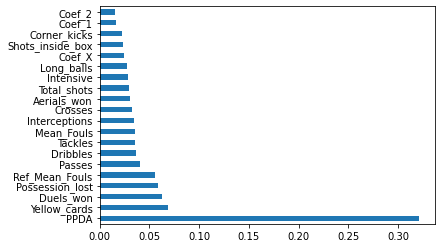

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X,y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
print(feat_importances.sort_values())
feat_importances.nlargest(100).plot(kind='barh')